## **Model LSTM**

---

Uji Coba #1

Penelitian                             : [link Dataset](https://github.com/katoch99/Twitter-Emotion-Recognition)

### 01. Installing nlp package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns


### 02. Load Data

In [3]:
df = pd.read_csv('..\Dataset\Training\Clean_train_data.csv')
df.head(20)

,Unnamed: 0,tweet,label
0,0,"['pagi', 'emosi']",Anger
1,1,"['stabilitas', 'negara', 'memange', 'tahun', '...",Anger
2,2,"['emosi', 'liat']",Anger
3,3,"['aib', 'bodoh', 'aib', 'muncul', 'tindak', 'k...",Anger
4,4,"['sebal', 'bodoh']",Anger
5,5,"['asli', 'malu', 'maluin', 'indo', 'tolol', 'r...",Anger
6,6,"['drama', 'abg', 'tolol']",Anger
7,7,"['emosi', 'katla', 'kemarin', 'terang', 'gin',...",Anger
8,8,"['bangsat', 'tribute', 'no', 'bencana', 'no', ...",Anger
9,9,"['pergi', 'teriak', 'nang', 'kencang', 'kencan...",Anger


In [4]:
print("Null Values:")
df.isna().sum()

Null Values:


Unnamed: 0    0
tweet         0
label         0
dtype: int64

### 03. Label Proposition

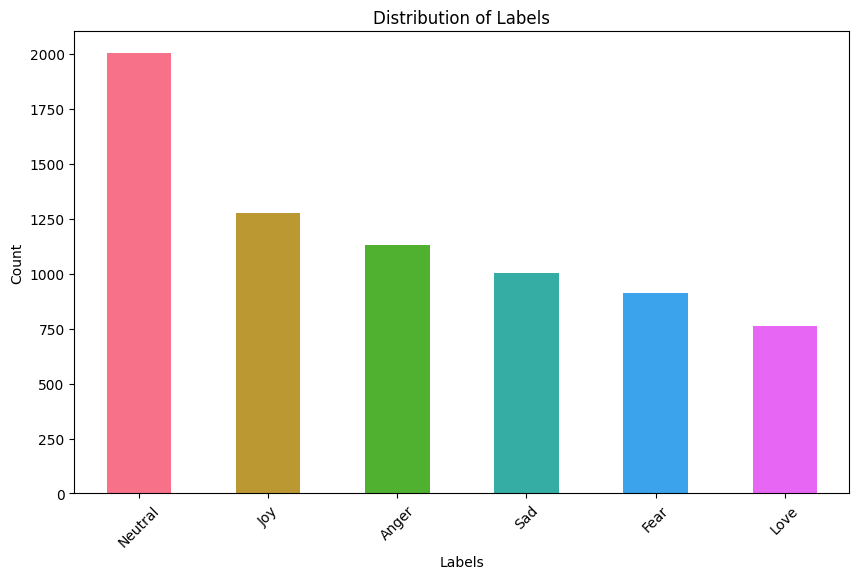

In [5]:
label_counts = df["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [6]:
def get_tweets(data):
    tweets = data['tweet'].tolist()
    labels = data['label'].tolist()
    return tweets, labels

tweets, labels = get_tweets(df)

In [7]:
train_tweets, val_tweets, train_labels, val_labels = train_test_split('Tweet', 'Label', test_size=0.2, random_state=42)

In [8]:
data = pd.DataFrame({'Tweet': tweets, 'Label': labels})

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

train_tweets = train_data['Tweet'].tolist()
train_labels = train_data['Label'].tolist()
val_tweets = val_data['Tweet'].tolist()
val_labels = val_data['Label'].tolist()

print("Training Tweets:", train_tweets)
print("Training Labels:", train_labels)
print("Validation Tweets:", val_tweets)
print("Validation Labels:", val_labels)


Training Tweets: ["['sayur', 'dhe']", "['makasih', 'kakak', 'bianca', 'nama', 'kakak', 'cantik', 'oh', 'suka', 'suka', 'bagus', 'genre', 'horror', 'sukaa', 'genre', 'pilih', 'thriller']", "['aa', 'lucu', 'sannie', 'takut', 'gedee', 'imut']", "['gubernur', 'cumut', 'diam', 'nanggepin', 'keledai', 'bodoh', 'akibat', 'malu', 'diemin', 'tar', 'abis', 'jabat']", "['sumpah', 'benci', 'kaya', 'gin', 'suka', 'diam', 'bikin', 'sakit', 'hati', 'gimana', 'sakit', 'anak', 'digituin', 'mb', 'sempurna', 'benci', 'mandang', 'fisik']", "['mari', 'kak', 'viu', 'start', 'puas', 'pakai', 'req', 'harga', 'payment', 'via', 'shopee', 'pay', 'tutup', 'shopee', 'pay', 'error', 'ready', 'preset', 'lightroom', 'via', 'gdrive', 'no', 'rush', 'order']", "['suka', 'cinta', 'kagum']", "['komen', 'buruk', 'otak', 'kayak', 'tolol']", "['cantik', 'biazaahh', 'foto', 'model', 'foto', 'konsep', 'pikir', 'mas', 'crush', 'temenku', 'sedih']", "['ttapi', 'suka', 'pakai', 'aksen', 'british', 'paham', 'dengernya', 'enakeun']

### Padding and Truncating Sequences

In [9]:
# Tokenizer initialization and fitting on training data
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(train_tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[59, 7, 56]]


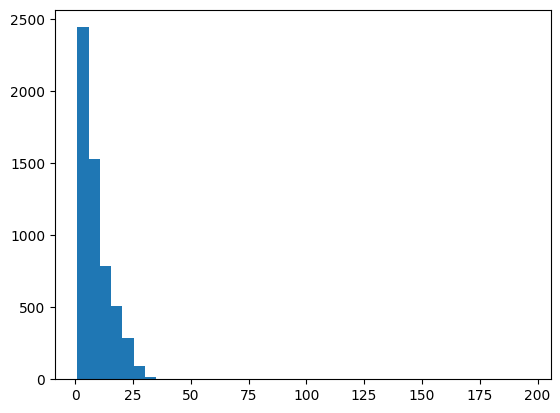

In [10]:
lengths = [len(t.split(' ')) for t in train_tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [11]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    if sequences:
        padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
        return padded_sequences
    else:
        return None

In [12]:
padded_train_sequences = get_sequences(tokenizer, train_tweets)

In [13]:
padded_train_sequences[10]

array([  69,  985,  513,   39,  480,  985, 1332,   47,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

### Menyiapkan Label

In [14]:
classes = set(labels)
print(classes)

{'Neutral', 'Anger', 'Fear', 'Joy', 'Love', 'Sad'}


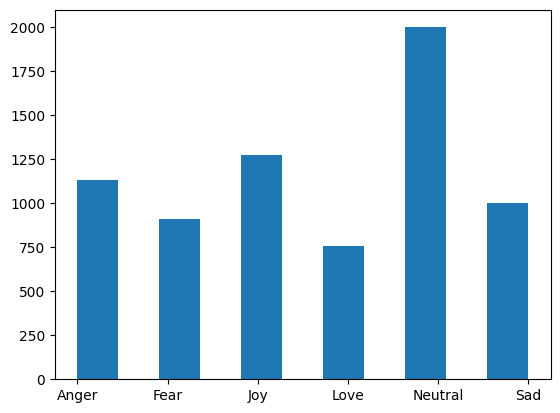

In [15]:
plt.hist(labels, bins=11)
plt.show()

In [16]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [17]:
classes_to_index

{'Neutral': 0, 'Anger': 1, 'Fear': 2, 'Joy': 3, 'Love': 4, 'Sad': 5}

In [18]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [19]:
# Converting text sequences to sequences of integers
padded_train_sequences = get_sequences(tokenizer, train_tweets)
val_sequences = get_sequences(tokenizer, val_tweets)

# Mapping label names to integer indices
train_labels = names_to_ids(train_labels)
val_labels = names_to_ids(val_labels)

In [20]:
print(val_labels)

[5 5 1 ... 0 5 4]


### Modelling

In [23]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 8, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define the callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=5,              
    restore_best_weights=True  
)


In [24]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=50,
    #callbacks=[early_stopping_callback]
)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.2846 - loss: 1.7221 - val_accuracy: 0.4965 - val_loss: 1.3527
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5824 - loss: 1.1835 - val_accuracy: 0.5805 - val_loss: 1.1349
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7136 - loss: 0.8728 - val_accuracy: 0.6066 - val_loss: 1.0680
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7995 - loss: 0.6557 - val_accuracy: 0.6314 - val_loss: 1.1097
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.8274 - loss: 0.5612 - val_accuracy: 0.6285 - val_loss: 1.1587
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8567 - loss: 0.4688 - val_accuracy: 0.5982 - val_loss: 1.2601
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8994 - loss: 0.3551 - val_accuracy: 0.5996 - val_loss: 1.3174
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9104 - loss: 0.3113 - val_ac

KeyboardInterrupt: 

In [ ]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=50,
    #callbacks=[early_stopping_callback]
)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.2846 - loss: 1.7221 - val_accuracy: 0.4965 - val_loss: 1.3527
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5824 - loss: 1.1835 - val_accuracy: 0.5805 - val_loss: 1.1349
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7136 - loss: 0.8728 - val_accuracy: 0.6066 - val_loss: 1.0680
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7995 - loss: 0.6557 - val_accuracy: 0.6314 - val_loss: 1.1097
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.8274 - loss: 0.5612 - val_accuracy: 0.6285 - val_loss: 1.1587
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8567 - loss: 0.4688 - val_accuracy: 0.5982 - val_loss: 1.2601
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8994 - loss: 0.3551 - val_accuracy: 0.5996 - val_loss: 1.3174
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9104 - loss: 0.3113 - val_ac

KeyboardInterrupt: 

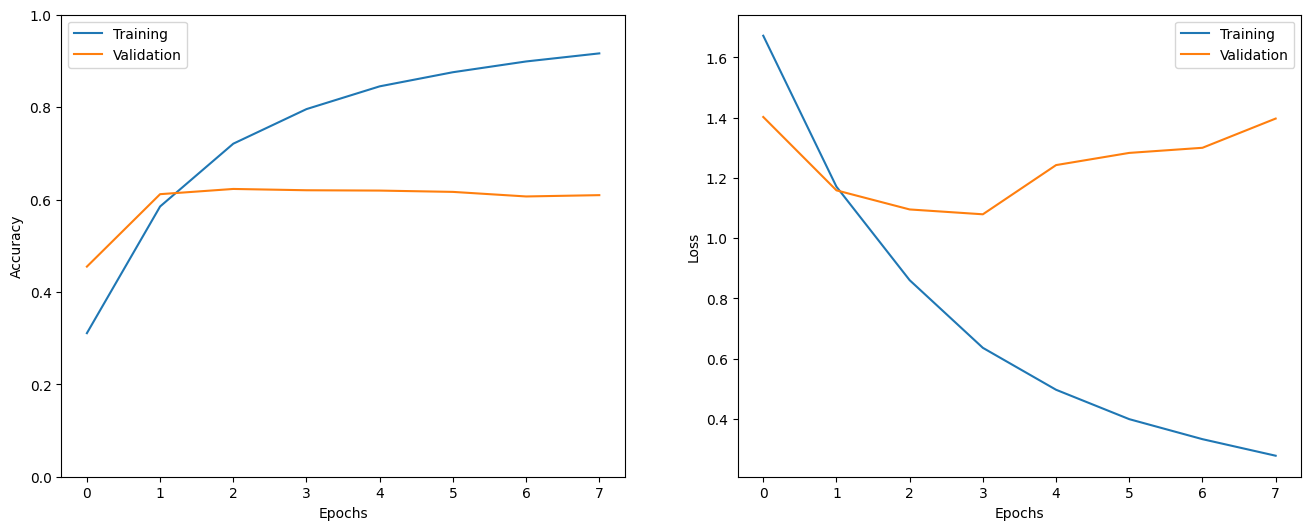

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [ ]:
test = pd.read_csv('..\Dataset\\Training\\not_preposessing.csv')

In [ ]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
eval = model.evaluate(test_sequences, test_labels)

222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2421 - loss: 2.2438


In [ ]:
for a in range(0,5):
  i = random.randint(0, len(test_labels) - 1)

  print('Tweet:', test_tweets[i])
  print('Actual Emotion:', index_to_classes[test_labels[i]])
  pred_prob = model.predict(np.expand_dims(test_sequences[i], axis=0))
  predicted_class_index = np.argmax(pred_prob)
  predicted_class = index_to_classes[predicted_class_index]
  
  print('Predicted Emotion:', predicted_class, '\n')

Tweet: anj j1min aing udah mau sedih, sialan lu ngetiknya kek gi mati aja, gk jlas lu ji udah lah gi gak usah d kasih jatah 5 bulan aja
Actual Emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Emotion: Anger 

Tweet: hai kak, maaf untuk pengalamannya ya. terkait muncul pop up pada layar hp kami sarankan untuk dapat cek setting kemudian cek pesan siaran lalu di off kan, jika masih berkendala kami sarankan lepas pasang kartu kemudian coba kembali ya. salam.^nay
Actual Emotion: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Emotion: Anger 

Tweet: gapapa udh biasa mandiri dari kecill
Actual Emotion: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Emotion: Neutral 

Tweet: kapan ya manajemen di rs diubah biar ga lempar lemparan gini anjimm orang ke rs tuh butuh penanganan cepet bukan bolak balik ribet. emosi kan gue ajgg
Actual Emotion: Anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Emotion: Anger 

Tweet: yukk gass, sudah siap mental siapa saja yang ma